In [ ]:
# Setup visualization libraries and load data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
import os

# Set plot aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Custom colors for WattGrid theme
wattgrid_colors = ["#1A5276", "#2E86C1", "#85C1E9", "#F39C12", "#E74C3C"]
sns.set_palette(sns.color_palette(wattgrid_colors))

# Define paths
PROJECT_PATH = "/content/drive/MyDrive/WattGrid"
PROCESSED_DATA_PATH = os.path.join(PROJECT_PATH, "data/processed/cleaned_data.csv")
FIGURES_PATH = os.path.join(PROJECT_PATH, "figures")

# Create figures directory if it doesn't exist
if not os.path.exists(FIGURES_PATH):
    os.makedirs(FIGURES_PATH)
    print(f"Created figures directory at: {FIGURES_PATH}")

# Load the processed dataset
df = pd.read_csv(PROCESSED_DATA_PATH)
print(f"Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Check missing values
print("\n Missing Values Before Handling:")
print(df.isnull().sum())

Data Loaded: 9547558 rows, 8 columns

 Missing Values Before Handling:
TradingDate               0
TradingPeriod             0
PublishDateTime           0
PointOfConnection         0
Island                    0
IsProxyPriceFlag          0
DollarsPerMegawattHour    0
source_file               0
dtype: int64


In [ ]:
# Load the processed data
df = pd.read_csv(PROCESSED_DATA_PATH)
print(f"Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Data Loaded: 9547558 rows, 8 columns


In [ ]:
# Check missing values
print("\ Missing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values
df["Island"].fillna("Unknown", inplace=True)

# Confirm missing values handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


\ Missing Values Before Handling:
TradingDate               0
TradingPeriod             0
PublishDateTime           0
PointOfConnection         0
Island                    0
IsProxyPriceFlag          0
DollarsPerMegawattHour    0
source_file               0
dtype: int64

Missing Values After Handling:


<ipython-input-12-7fecf40ac3a7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Island"].fillna("Unknown", inplace=True)


TradingDate               0
TradingPeriod             0
PublishDateTime           0
PointOfConnection         0
Island                    0
IsProxyPriceFlag          0
DollarsPerMegawattHour    0
source_file               0
dtype: int64


In [ ]:
#Remove Outliers
df = df[(df["DollarsPerMegawattHour"] >= 0) & (df["DollarsPerMegawattHour"] <= 5000)]

print(f"Outliers Removed! Remaining Rows: {df.shape[0]}")


Outliers Removed! Remaining Rows: 9547558


In [ ]:
# Feature Engineering
df["RollingMean_7"] = df["DollarsPerMegawattHour"].rolling(window=7, min_periods=1).mean()
df["RollingStd_7"] = df["DollarsPerMegawattHour"].rolling(window=7, min_periods=1).std()
df["Lag_1"] = df["DollarsPerMegawattHour"].shift(1)
df["PriceVolatility"] = df["RollingStd_7"] / df["RollingMean_7"]

# Drop NaN values created by shifting/rolling calculations
df.dropna(inplace=True)

# Confirm new features exist
print("\nFeature Engineering Done! Final Columns:")
print(df.columns)



Feature Engineering Done! Final Columns:
Index(['TradingDate', 'TradingPeriod', 'PublishDateTime', 'PointOfConnection',
       'Island', 'IsProxyPriceFlag', 'DollarsPerMegawattHour', 'source_file',
       'RollingMean_7', 'RollingStd_7', 'Lag_1', 'PriceVolatility'],
      dtype='object')


In [ ]:
# Save to Google Drive
df.to_csv(PROCESSED_DATA_PATH, index=False)
print(f"Processed Data Saved at: {PROCESSED_DATA_PATH}")


KeyboardInterrupt: 

In [ ]:
# Load processed data for verification
df = pd.read_csv(PROCESSED_DATA_PATH)

# Check if features exist
expected_features = ["DollarsPerMegawattHour", "RollingMean_7", "RollingStd_7", "Lag_1", "PriceVolatility"]
missing_features = [col for col in expected_features if col not in df.columns]

print("\nMissing Features:" if missing_features else "\nAll Features Present!")
print(missing_features if missing_features else "Everything looks good!")



All Features Present!
Everything looks good!


In [ ]:
# Setup visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
import os

# Set plot aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Custom colors for WattGrid theme
wattgrid_colors = ["#1A5276", "#2E86C1", "#85C1E9", "#F39C12", "#E74C3C"]
sns.set_palette(sns.color_palette(wattgrid_colors))

# Define paths
PROJECT_PATH = "/content/drive/MyDrive/WattGrid"
PROCESSED_DATA_PATH = os.path.join(PROJECT_PATH, "data/processed/cleaned_data.csv")
FIGURES_PATH = os.path.join(PROJECT_PATH, "figures")

# Create figures directory if it doesn't exist
if not os.path.exists(FIGURES_PATH):
    os.makedirs(FIGURES_PATH)
    print(f"Created figures directory at: {FIGURES_PATH}")

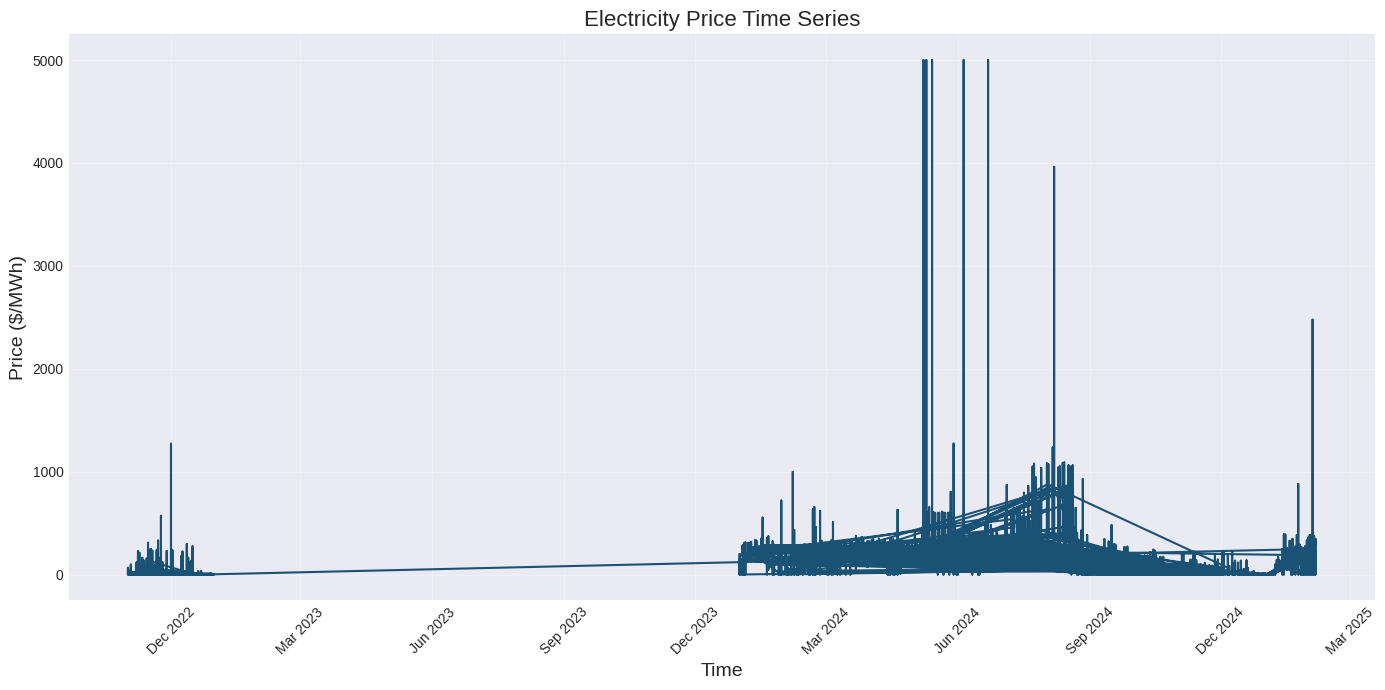

In [ ]:
# Time Series Visualization of Electricity Prices
# Load the processed dataset
processed_df = pd.read_csv(PROCESSED_DATA_PATH)

# Check if there's a datetime column, if not create one for demo
datetime_cols = [col for col in processed_df.columns if any(term in col.lower() for term in ['date', 'time', 'period'])]

if datetime_cols:
    # Use the first datetime column found
    time_col = datetime_cols[0]
    processed_df[time_col] = pd.to_datetime(processed_df[time_col])

    plt.figure(figsize=(14, 7))
    plt.plot(processed_df[time_col], processed_df['DollarsPerMegawattHour'], linewidth=1.5)
    plt.title('Electricity Price Time Series')
    plt.xlabel('Time')
    plt.ylabel('Price ($/MWh)')
    plt.grid(True, alpha=0.3)

    # Format date ticks based on the time span
    date_range = (processed_df[time_col].max() - processed_df[time_col].min()).days
    if date_range > 365:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    elif date_range > 30:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    else:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_PATH, 'price_timeseries.png'), dpi=300)
    plt.show()
else:
    print("No datetime column found. Using row indices for time series visualization.")
    # Use index as a proxy for time
    plt.figure(figsize=(14, 7))
    plt.plot(processed_df['DollarsPerMegawattHour'].values, linewidth=1.5)
    plt.title('Electricity Price Series')
    plt.xlabel('Time Period')
    plt.ylabel('Price ($/MWh)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_PATH, 'price_series.png'), dpi=300)
    plt.show()

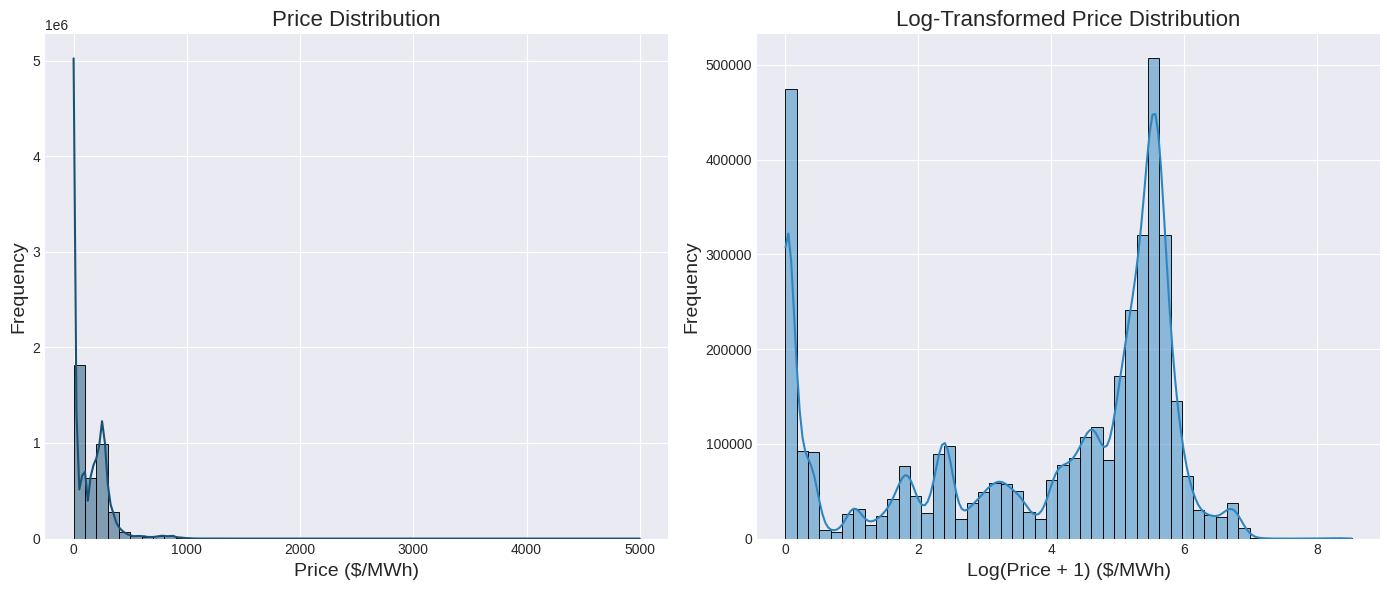

In [ ]:
# Price Distribution Analysis
plt.figure(figsize=(14, 6))

# Price distribution with KDE
plt.subplot(1, 2, 1)
sns.histplot(processed_df['DollarsPerMegawattHour'], bins=50, kde=True, color=wattgrid_colors[0])
plt.title('Price Distribution')
plt.xlabel('Price ($/MWh)')
plt.ylabel('Frequency')

# Log-transformed price distribution
plt.subplot(1, 2, 2)
log_price = np.log1p(processed_df['DollarsPerMegawattHour'])
sns.histplot(log_price, bins=50, kde=True, color=wattgrid_colors[1])
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1) ($/MWh)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'price_distribution_analysis.png'), dpi=300)
plt.show()

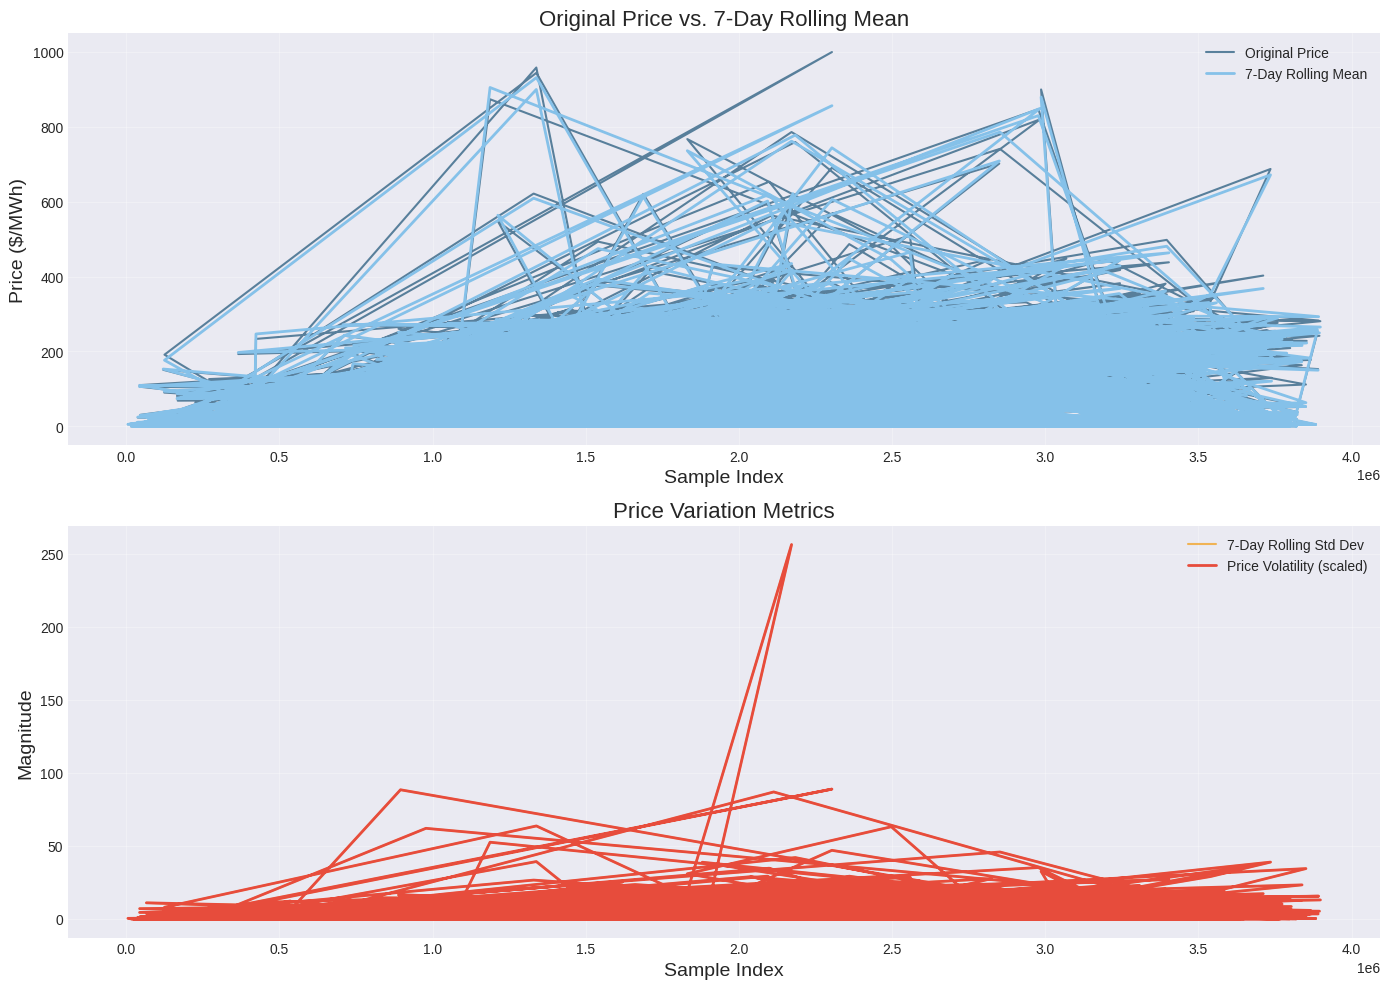

In [ ]:
# Rolling Statistics Visualization
sample_size = min(1000, len(processed_df))
sample_df = processed_df.sample(sample_size) if len(processed_df) > sample_size else processed_df

plt.figure(figsize=(14, 10))

# Original vs Rolling Mean
plt.subplot(2, 1, 1)
plt.plot(sample_df.index, sample_df['DollarsPerMegawattHour'], label='Original Price', color=wattgrid_colors[0], alpha=0.7)
plt.plot(sample_df.index, sample_df['RollingMean_7'], label='7-Day Rolling Mean', color=wattgrid_colors[2], linewidth=2)
plt.title('Original Price vs. 7-Day Rolling Mean')
plt.xlabel('Sample Index')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.grid(True, alpha=0.3)

# Rolling Standard Deviation and Volatility
plt.subplot(2, 1, 2)
plt.plot(sample_df.index, sample_df['RollingStd_7'], label='7-Day Rolling Std Dev', color=wattgrid_colors[3], alpha=0.7)
plt.plot(sample_df.index, sample_df['PriceVolatility']*sample_df['RollingMean_7'],
         label='Price Volatility (scaled)', color=wattgrid_colors[4], linewidth=2)
plt.title('Price Variation Metrics')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'rolling_statistics.png'), dpi=300)
plt.show()

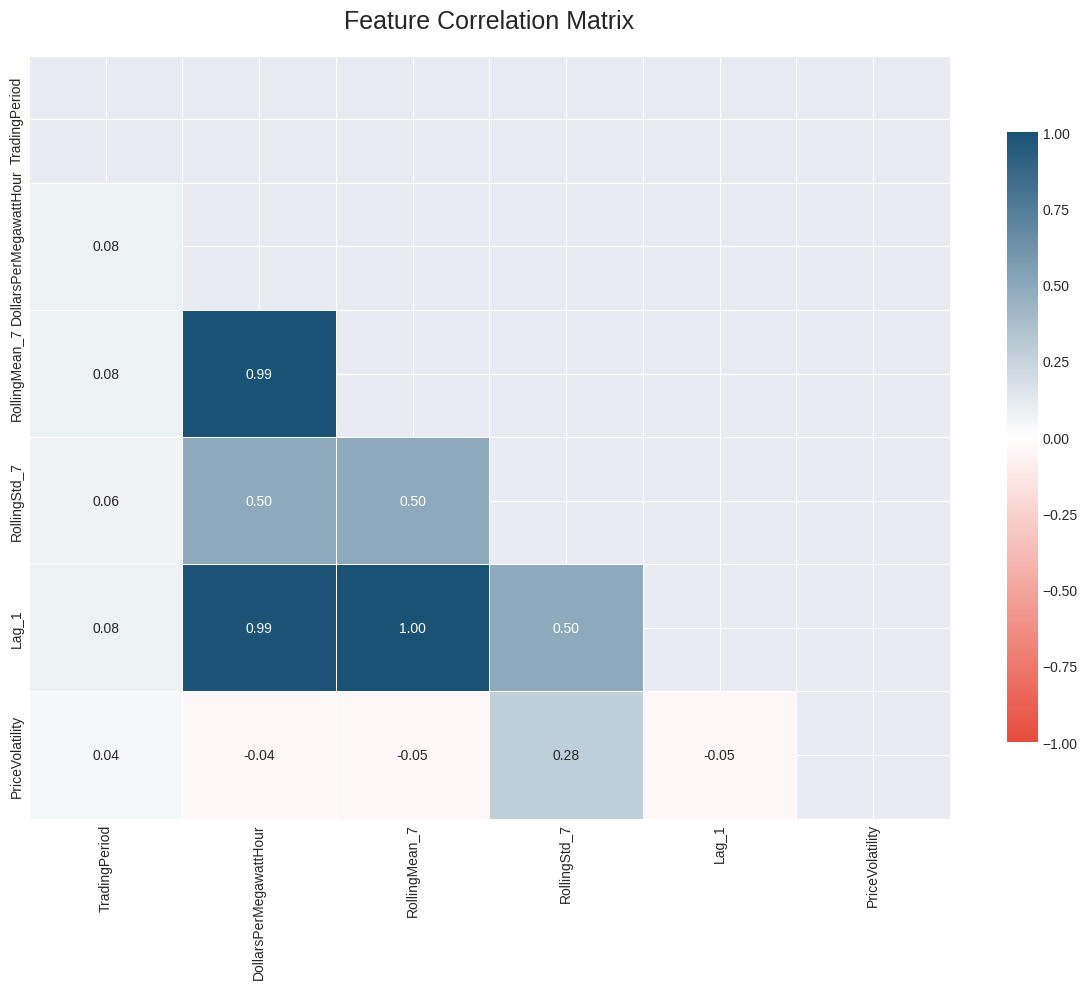

In [ ]:
# Feature Correlation Matrix with Custom Styling
# Select only the numeric columns
numeric_cols = processed_df.select_dtypes(include=[np.number]).columns.tolist()
correlation = processed_df[numeric_cols].corr()

# Create a custom colormap for the correlation matrix
cmap = LinearSegmentedColormap.from_list("wattgrid_correlation",
                                         [wattgrid_colors[4], "#FFFFFF", wattgrid_colors[0]])

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'correlation_matrix.png'), dpi=300)
plt.show()

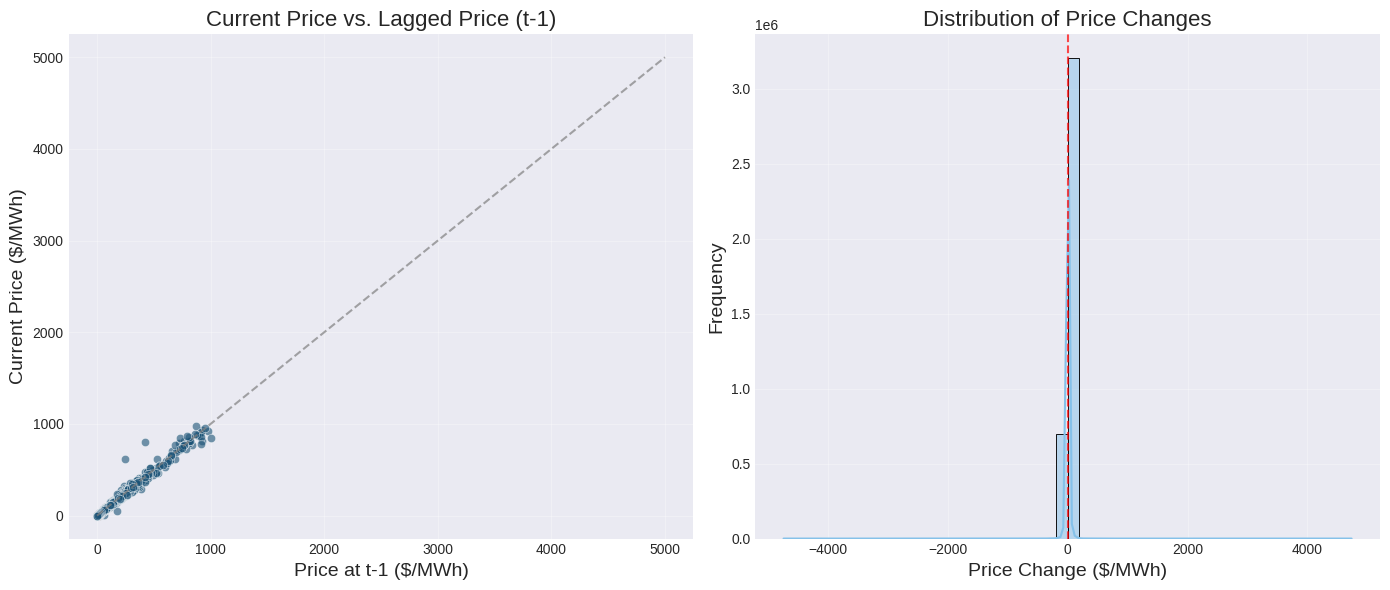

In [ ]:
# Lag Relationship Analysis
plt.figure(figsize=(14, 6))

# Scatter plot of current vs. lagged prices
plt.subplot(1, 2, 1)
sns.scatterplot(x='Lag_1', y='DollarsPerMegawattHour',
                data=processed_df.sample(min(2000, len(processed_df))),
                alpha=0.6, color=wattgrid_colors[0])
# Add a reference line
min_val = min(processed_df['Lag_1'].min(), processed_df['DollarsPerMegawattHour'].min())
max_val = max(processed_df['Lag_1'].max(), processed_df['DollarsPerMegawattHour'].max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', alpha=0.7)
plt.title('Current Price vs. Lagged Price (t-1)')
plt.xlabel('Price at t-1 ($/MWh)')
plt.ylabel('Current Price ($/MWh)')
plt.grid(True, alpha=0.3)

# Price change distribution
plt.subplot(1, 2, 2)
price_changes = processed_df['DollarsPerMegawattHour'] - processed_df['Lag_1']
sns.histplot(price_changes, bins=50, kde=True, color=wattgrid_colors[2])
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.title('Distribution of Price Changes')
plt.xlabel('Price Change ($/MWh)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'lag_relationship.png'), dpi=300)
plt.show()

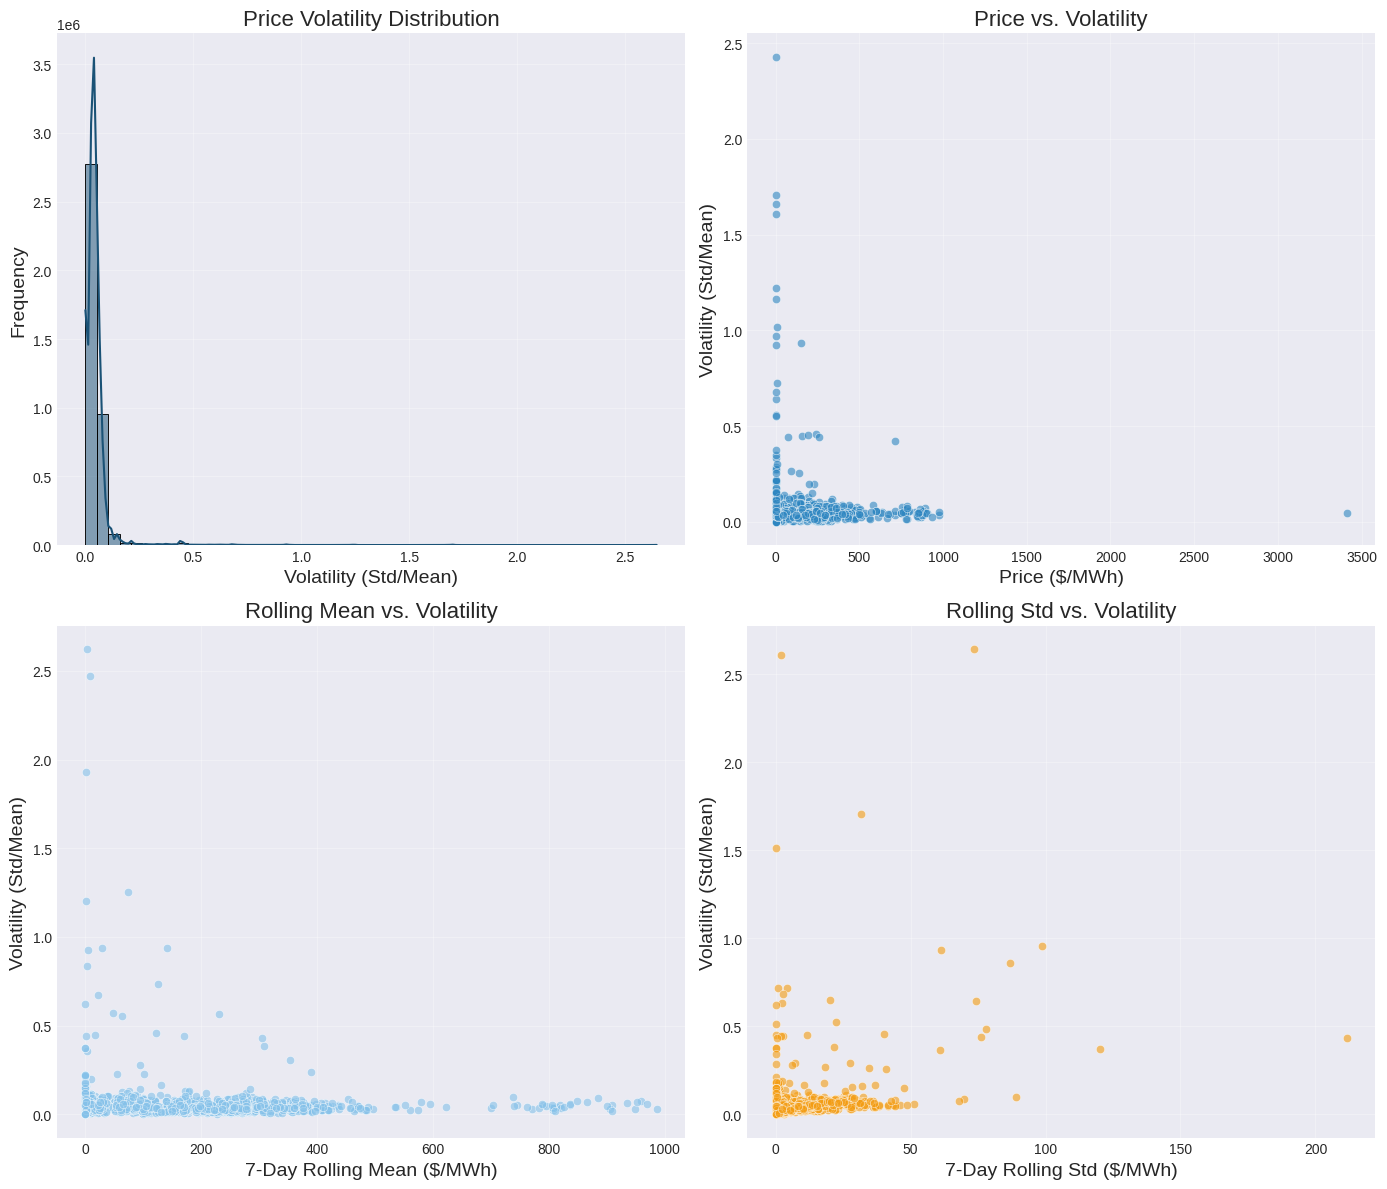

In [ ]:
# Price Volatility Analysis
plt.figure(figsize=(14, 12))

# Price volatility histogram
plt.subplot(2, 2, 1)
sns.histplot(processed_df['PriceVolatility'], bins=50, kde=True, color=wattgrid_colors[0])
plt.title('Price Volatility Distribution')
plt.xlabel('Volatility (Std/Mean)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Price vs Volatility
plt.subplot(2, 2, 2)
sns.scatterplot(x='DollarsPerMegawattHour', y='PriceVolatility',
                data=processed_df.sample(min(2000, len(processed_df))),
                alpha=0.6, color=wattgrid_colors[1])
plt.title('Price vs. Volatility')
plt.xlabel('Price ($/MWh)')
plt.ylabel('Volatility (Std/Mean)')
plt.grid(True, alpha=0.3)

# Rolling Mean vs Volatility
plt.subplot(2, 2, 3)
sns.scatterplot(x='RollingMean_7', y='PriceVolatility',
                data=processed_df.sample(min(2000, len(processed_df))),
                alpha=0.6, color=wattgrid_colors[2])
plt.title('Rolling Mean vs. Volatility')
plt.xlabel('7-Day Rolling Mean ($/MWh)')
plt.ylabel('Volatility (Std/Mean)')
plt.grid(True, alpha=0.3)

# Rolling Std vs Volatility
plt.subplot(2, 2, 4)
sns.scatterplot(x='RollingStd_7', y='PriceVolatility',
                data=processed_df.sample(min(2000, len(processed_df))),
                alpha=0.6, color=wattgrid_colors[3])
plt.title('Rolling Std vs. Volatility')
plt.xlabel('7-Day Rolling Std ($/MWh)')
plt.ylabel('Volatility (Std/Mean)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'volatility_analysis.png'), dpi=300)
plt.show()

<ipython-input-24-353991be87aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y='DollarsPerMegawattHour', data=processed_df, palette=wattgrid_colors)
<ipython-input-24-353991be87aa>:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(x=cat_col, y='DollarsPerMegawattHour', data=processed_df, palette=wattgrid_colors)


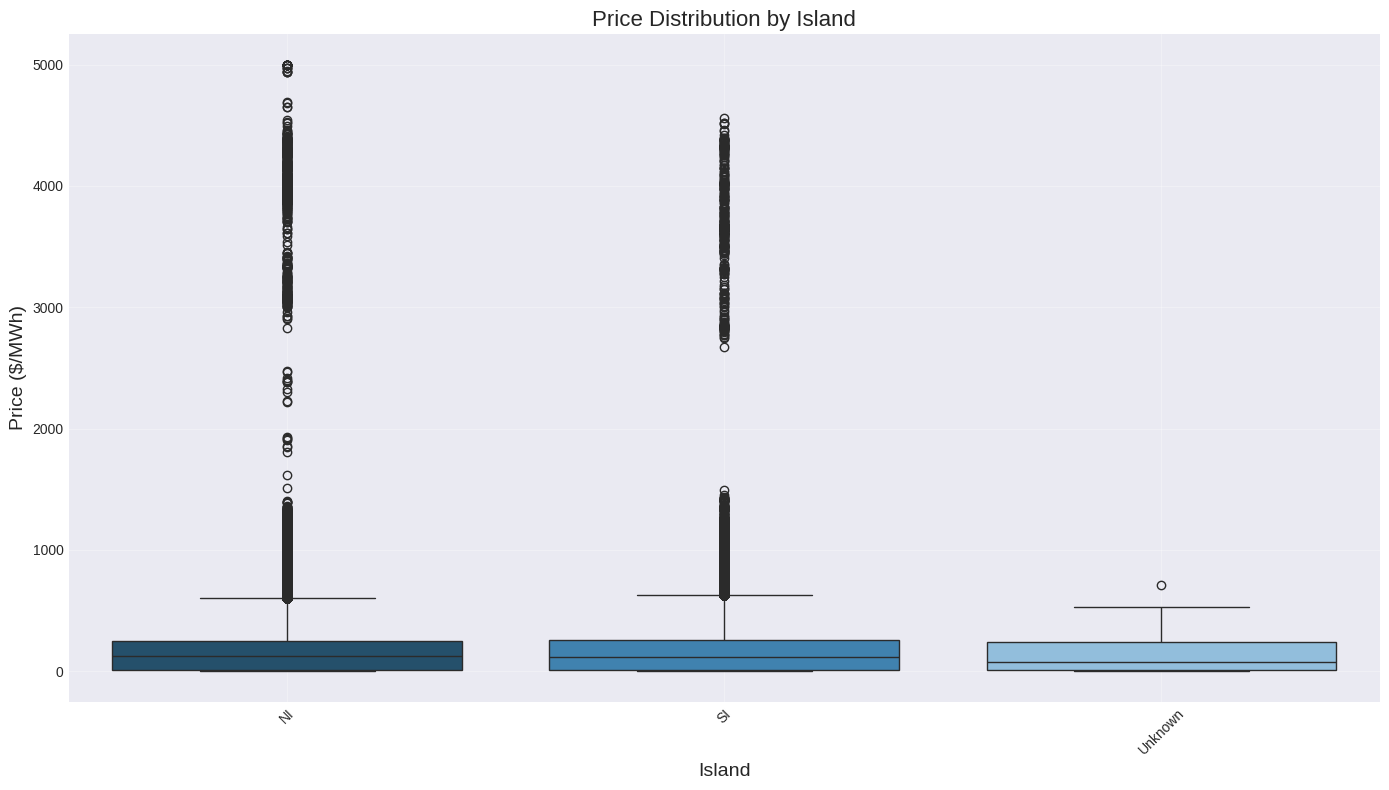

Other categorical columns that could be visualized: ['IsProxyPriceFlag']


In [ ]:
# Box Plots by Category (if categorical columns exist)
# Check for categorical columns
categorical_cols = [col for col in processed_df.columns
                   if col not in numeric_cols and processed_df[col].nunique() < 20]

if categorical_cols:
    # Select the first categorical column for demonstration
    cat_col = categorical_cols[0]

    plt.figure(figsize=(14, 8))
    sns.boxplot(x=cat_col, y='DollarsPerMegawattHour', data=processed_df, palette=wattgrid_colors)
    plt.title(f'Price Distribution by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Price ($/MWh)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_PATH, f'price_by_{cat_col}.png'), dpi=300)
    plt.show()

    if len(categorical_cols) > 1:
        print(f"Other categorical columns that could be visualized: {categorical_cols[1:]}")
else:
    print("No categorical columns found for box plot visualization.")

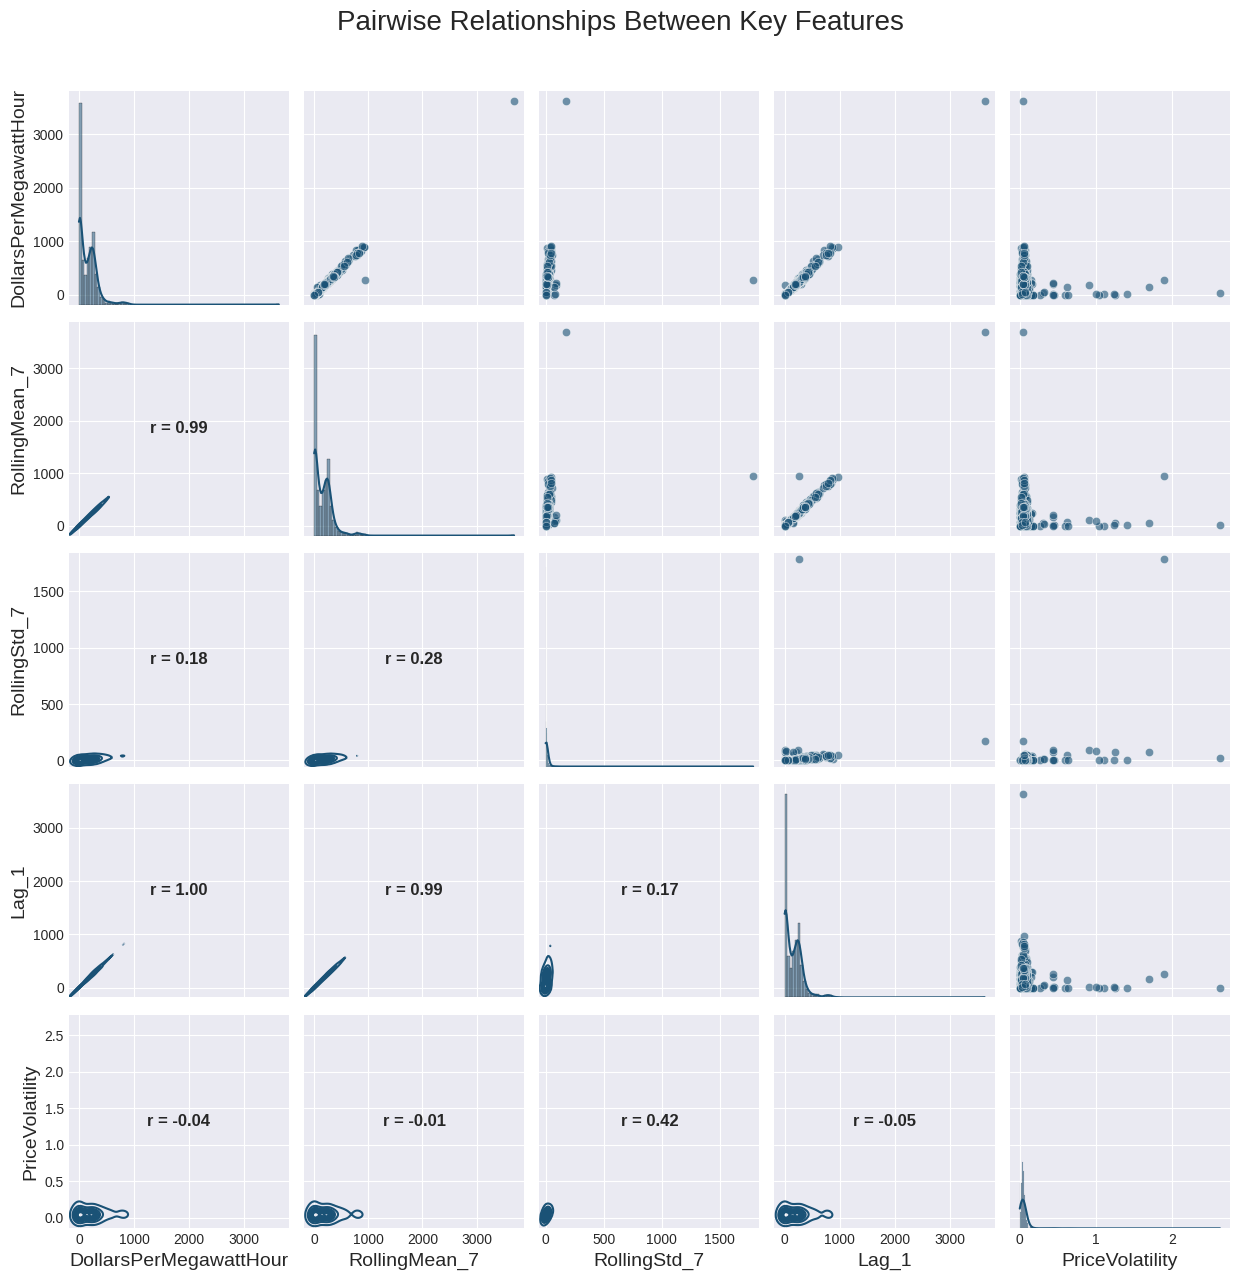

In [ ]:
# Feature Pair Plot (for key features)
key_features = ['DollarsPerMegawattHour', 'RollingMean_7', 'RollingStd_7', 'Lag_1', 'PriceVolatility']
sample_for_pairplot = processed_df[key_features].sample(min(1000, len(processed_df)))

pair_grid = sns.PairGrid(sample_for_pairplot)
pair_grid.map_upper(sns.scatterplot, alpha=0.6)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.histplot, kde=True)

for i, feature1 in enumerate(key_features):
    for j, feature2 in enumerate(key_features):
        if i > j:  # Only add correlation text to the lower triangle
            ax = pair_grid.axes[i, j]
            corr = sample_for_pairplot[feature1].corr(sample_for_pairplot[feature2])
            ax.text(0.5, 0.5, f'r = {corr:.2f}',
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes, fontsize=12, fontweight='bold')

plt.suptitle('Pairwise Relationships Between Key Features', y=1.02, fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'feature_pairplot.png'), dpi=300)
plt.show()

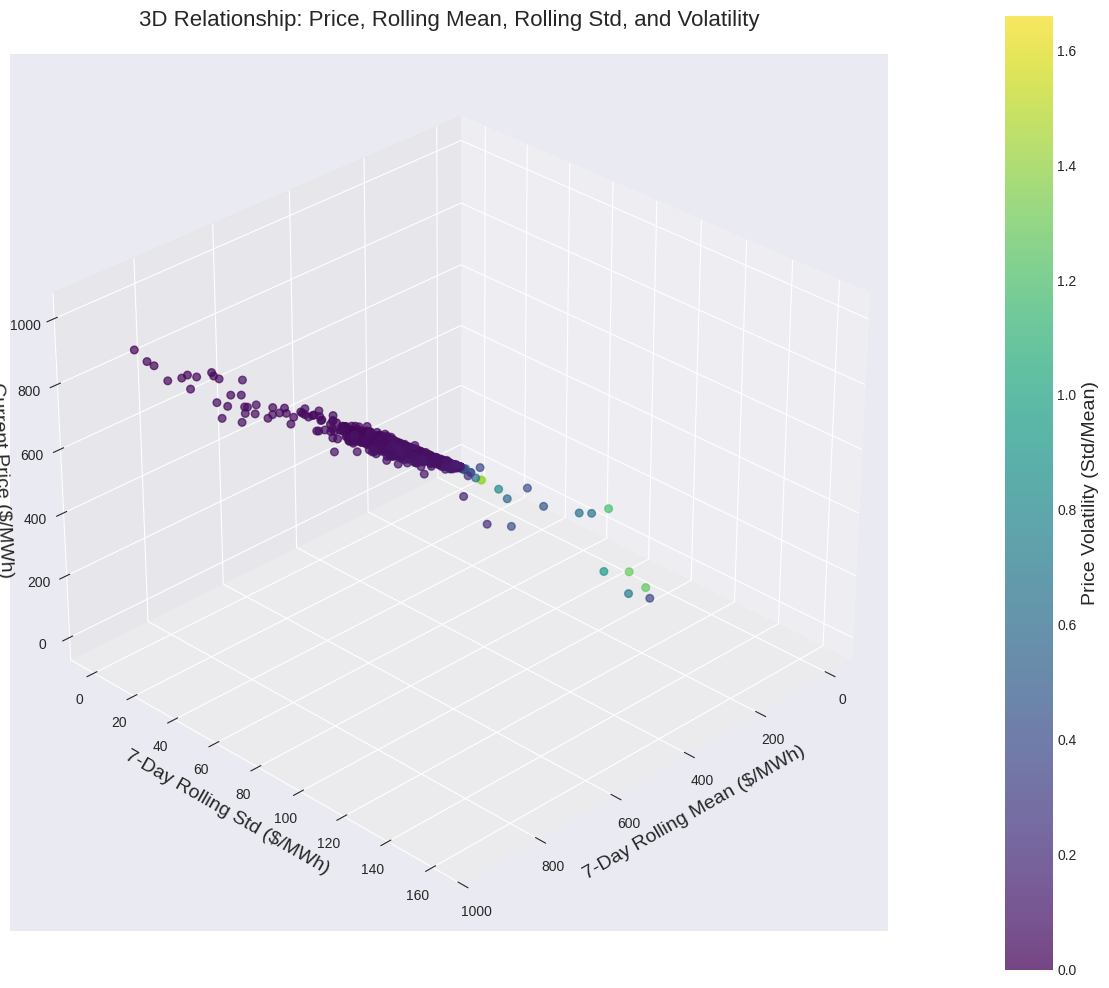

In [ ]:
# 3D Visualization of Key Feature Relationships
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Sample data for better visualization
sample_3d = processed_df.sample(min(2000, len(processed_df)))

# 3D scatter plot
scatter = ax.scatter(sample_3d['RollingMean_7'],
                     sample_3d['RollingStd_7'],
                     sample_3d['DollarsPerMegawattHour'],
                     c=sample_3d['PriceVolatility'],
                     cmap='viridis',
                     s=30, alpha=0.7)

# Add a colorbar to represent the volatility dimension
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Price Volatility (Std/Mean)')

# Set labels and title
ax.set_xlabel('7-Day Rolling Mean ($/MWh)')
ax.set_ylabel('7-Day Rolling Std ($/MWh)')
ax.set_zlabel('Current Price ($/MWh)')
ax.set_title('3D Relationship: Price, Rolling Mean, Rolling Std, and Volatility', pad=20)

# Rotate the plot for better viewing angle
ax.view_init(30, 45)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, '3d_feature_relationship.png'), dpi=300)
plt.show()